In [33]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [34]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [35]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

### 필요한 데이더 불러오기 

In [36]:
df = pd.read_csv('./실전db_after_2013.csv')
df

,Unnamed: 0,USER_ID,JOIN_YNM,JOIN_YEAR,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,0,2858,2014-01,2014,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,1,5647,2014-02,2014,2014-02-14,BB,182009,A,2020-01-01,1,J
2,2,33314,2014-11,2014,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,3,37001,2014-12,2014,2014-12-04,BB,725,C,2020-01-01,1,MP
4,4,37819,2014-12,2014,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...,...,...,...
878173,879266,1830551,2020-12,2020,2020-12-31,BB,219886,B,2020-12-31,1,GN
878174,879267,1830570,2020-12,2020,2020-12-31,BB,82433,B,2020-12-31,1,CY
878175,879268,1830580,2020-12,2020,2020-12-31,AA,92020,B,2020-12-31,1,JRR
878176,879269,1830589,2020-12,2020,2020-12-31,BB,92437,B,2020-12-31,1,J


### 요일 컬럼 파생변수 넣어주기

In [37]:
df['DATE'] = pd.to_datetime(df['DATE'])

# 요일 컬럼 넣어주기 (월요일:0 ~ 일요일:6)
# 주말(토,일)은 5,6
df['dayOFweek'] = df['DATE'].dt.weekday
df

,Unnamed: 0,USER_ID,JOIN_YNM,JOIN_YEAR,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,dayOFweek
0,0,2858,2014-01,2014,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,1,5647,2014-02,2014,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,2,33314,2014-11,2014,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,3,37001,2014-12,2014,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,4,37819,2014-12,2014,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...,...,...,...
878173,879266,1830551,2020-12,2020,2020-12-31,BB,219886,B,2020-12-31,1,GN,3
878174,879267,1830570,2020-12,2020,2020-12-31,BB,82433,B,2020-12-31,1,CY,3
878175,879268,1830580,2020-12,2020,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3
878176,879269,1830589,2020-12,2020,2020-12-31,BB,92437,B,2020-12-31,1,J,3


In [38]:
# 공휴일은 주말로 바꿔주기
holiday_list = ['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-03-01', '2020-05-05', '2020-04-15', '2020-04-30', '2020-06-06', '2020-08-15', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25']

for i in range(len(df)) :
    if df['DATE'].loc[i].strftime('%Y-%m-%d') in holiday_list :
        df['dayOFweek'].loc[i] = 6
        
df

,Unnamed: 0,USER_ID,JOIN_YNM,JOIN_YEAR,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,dayOFweek
0,0,2858,2014-01,2014,2014-01-07,AA,1892,A,2020-01-01,1,GN,6
1,1,5647,2014-02,2014,2014-02-14,BB,182009,A,2020-01-01,1,J,6
2,2,33314,2014-11,2014,2014-11-20,BB,82431,A,2020-01-01,1,SC,6
3,3,37001,2014-12,2014,2014-12-04,BB,725,C,2020-01-01,1,MP,6
4,4,37819,2014-12,2014,2014-12-07,AA,220691,C,2020-01-01,1,JRR,6
...,...,...,...,...,...,...,...,...,...,...,...,...
878173,879266,1830551,2020-12,2020,2020-12-31,BB,219886,B,2020-12-31,1,GN,3
878174,879267,1830570,2020-12,2020,2020-12-31,BB,82433,B,2020-12-31,1,CY,3
878175,879268,1830580,2020-12,2020,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3
878176,879269,1830589,2020-12,2020,2020-12-31,BB,92437,B,2020-12-31,1,J,3


In [39]:
price_df = pd.read_csv('./price_column_added.csv')
price_df

,Unnamed: 0,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,PRICE
0,0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,9018.160
1,1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,9018.160
2,2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,9018.160
3,3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,7376.125
4,4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,7376.125
...,...,...,...,...,...,...,...,...,...,...
879266,879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,1182.200
879267,879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,1182.200
879268,879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,1182.200
879269,879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,1182.200


In [40]:
rfm_df = pd.read_csv('./RFM_완성본.csv')
rfm_df

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M
0,224,29635200.0,2,16394.3,5,3,3
1,232,27820800.0,23,190537.5,4,5,5
2,342,26265600.0,1,9018.2,4,1,2
3,565,27302400.0,2,8558.3,4,3,2
4,729,21427200.0,1,9018.2,3,1,2
...,...,...,...,...,...,...,...
165419,1830551,31536000.0,1,1182.2,5,1,1
165420,1830570,31536000.0,1,1182.2,5,1,1
165421,1830580,31536000.0,1,1182.2,5,1,1
165422,1830589,31536000.0,1,1182.2,5,1,1


In [41]:
# 총점 컬럼 만들어주기 
rfm_df['RFM_total_score'] = 0

for i in range(len(rfm_df)):
    rfm_df['RFM_total_score'][i] = rfm_df['Recency_R'][i]+rfm_df['Frequency_F'][i]+rfm_df['Monetary_M'][i]
rfm_df

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,RFM_total_score
0,224,29635200.0,2,16394.3,5,3,3,11
1,232,27820800.0,23,190537.5,4,5,5,14
2,342,26265600.0,1,9018.2,4,1,2,7
3,565,27302400.0,2,8558.3,4,3,2,9
4,729,21427200.0,1,9018.2,3,1,2,6
...,...,...,...,...,...,...,...,...
165419,1830551,31536000.0,1,1182.2,5,1,1,7
165420,1830570,31536000.0,1,1182.2,5,1,1,7
165421,1830580,31536000.0,1,1182.2,5,1,1,7
165422,1830589,31536000.0,1,1182.2,5,1,1,7


# RMF 점수를 기반 상위 그룹 분석 

In [42]:
# 총점이 높은 순으로 정렬
sorted_score = rfm_df.sort_values(by='RFM_total_score', ascending=False)
sorted_score

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,RFM_total_score
39333,931139,30067200.0,16,144290.6,5,5,5,15
76759,1360898,31536000.0,37,342690.1,5,5,5,15
13400,534403,28598400.0,8,64309.3,5,5,5,15
13404,534474,30585600.0,17,127036.2,5,5,5,15
149635,1728813,30585600.0,9,81163.4,5,5,5,15
...,...,...,...,...,...,...,...,...
108502,1544796,9331200.0,1,7376.1,1,1,1,3
108500,1544788,9244800.0,1,1182.2,1,1,1,3
28880,784227,777600.0,1,1182.2,1,1,1,3
108498,1544781,9244800.0,1,1182.2,1,1,1,3


In [43]:
# 최고점을 받은 고객은 12311명
best_customers = rfm_df[rfm_df['RFM_total_score'] == 15]
best_customers

,USER_ID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,RFM_total_score
24,5067,31190400.0,7,59843.0,5,5,5,15
33,6998,30672000.0,14,1820617.6,5,5,5,15
39,7973,28857600.0,76,685380.2,5,5,5,15
41,8595,30240000.0,11,99199.8,5,5,5,15
50,11009,31536000.0,41,363090.8,5,5,5,15
...,...,...,...,...,...,...,...,...
164227,1819864,31536000.0,8,72145.3,5,5,5,15
164242,1819947,31536000.0,8,72145.3,5,5,5,15
164244,1819951,31449600.0,7,63127.1,5,5,5,15
164271,1820133,31536000.0,8,72145.3,5,5,5,15


In [44]:
# 최고점 받은 고객의 세부정보 합치기 
best_customers_detail = pd.merge(best_customers, df, how='inner', on='USER_ID')
best_customers_detail = best_customers_detail[['USER_ID', 'RFM_total_score', 'JOIN_DATE', 'D_TYPE', 'STORE_ID','GOODS_TYPE','DATE','COUNT','AD1', 'dayOFweek']]
best_customers_detail

,USER_ID,RFM_total_score,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,dayOFweek
0,5067,15,2014-02-04,BB,203763,C,2020-01-10,1,MP,4
1,5067,15,2014-02-04,BB,220611,A,2020-02-21,1,GSN,4
2,5067,15,2014-02-04,BB,182296,A,2020-05-15,1,SC,4
3,5067,15,2014-02-04,BB,182296,A,2020-05-19,1,SC,1
4,5067,15,2014-02-04,BB,182296,A,2020-05-20,1,SC,2
...,...,...,...,...,...,...,...,...,...,...
337278,1820289,15,2020-12-21,AA,219936,A,2020-12-27,1,YD,6
337279,1820289,15,2020-12-21,AA,219936,A,2020-12-28,1,YD,0
337280,1820289,15,2020-12-21,AA,219936,A,2020-12-29,1,YD,1
337281,1820289,15,2020-12-21,AA,219936,A,2020-12-30,1,YD,2


In [45]:
best_customers_detail.groupby('USER_ID').count()

,RFM_total_score,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,dayOFweek
USER_ID,,,,,,,,,
5067,7,7,7,7,7,7,7,7,7
6998,14,14,14,14,14,14,14,14,14
7973,76,76,76,76,76,76,76,76,76
8595,11,11,11,11,11,11,11,11,11
11009,41,41,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...
1819864,8,8,8,8,8,8,8,8,8
1819947,8,8,8,8,8,8,8,8,8
1819951,7,7,7,7,7,7,7,7,7


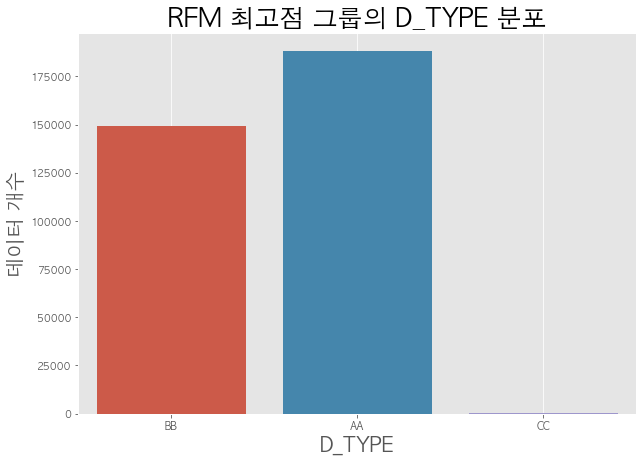

In [46]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
# sns.set_style('darkgrid')
sns.countplot(x  = 'D_TYPE', data = best_customers_detail)
plt.grid()
plt.title('RFM 최고점 그룹의 D_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')
fig.show()

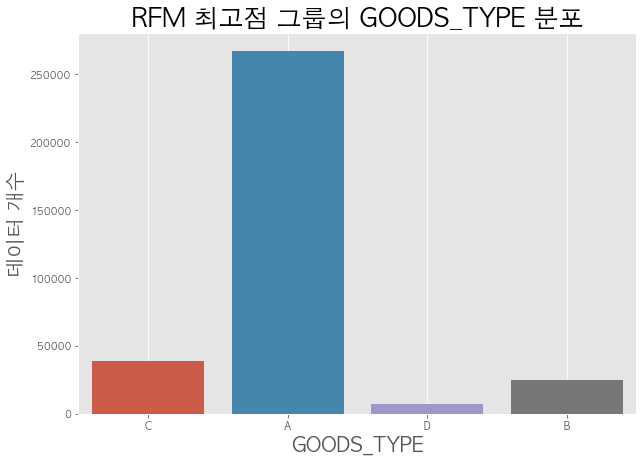

In [47]:
fig, ax = plt.subplots(1,1, figsize = (10, 7))
# sns.set_style('darkgrid')
sns.countplot(x  = 'GOODS_TYPE', data = best_customers_detail)
plt.grid()
plt.title('RFM 최고점 그룹의 GOODS_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('GOODS_TYPE', fontsize=20, fontweight = 'bold')
fig.show()

In [48]:
df_Goods_A = best_customers_detail[best_customers_detail['GOODS_TYPE']=='A']
print('GOODS_TYPE "A" 데이터 수 : '+ str(len(df_Goods_A)))
df_Goods_B = best_customers_detail[best_customers_detail['GOODS_TYPE']=='B']
print('GOODS_TYPE "B" 데이터 수 : '+ str(len(df_Goods_B)))
df_Goods_C = best_customers_detail[best_customers_detail['GOODS_TYPE']=='C']
print('GOODS_TYPE "C" 데이터 수 : '+ str(len(df_Goods_C)))
df_Goods_D = best_customers_detail[best_customers_detail['GOODS_TYPE']=='D']
print('GOODS_TYPE "D" 데이터 수 : '+ str(len(df_Goods_D)))

GOODS_TYPE "A" 데이터 수 : 267148
GOODS_TYPE "B" 데이터 수 : 24690
GOODS_TYPE "C" 데이터 수 : 38581
GOODS_TYPE "D" 데이터 수 : 6864


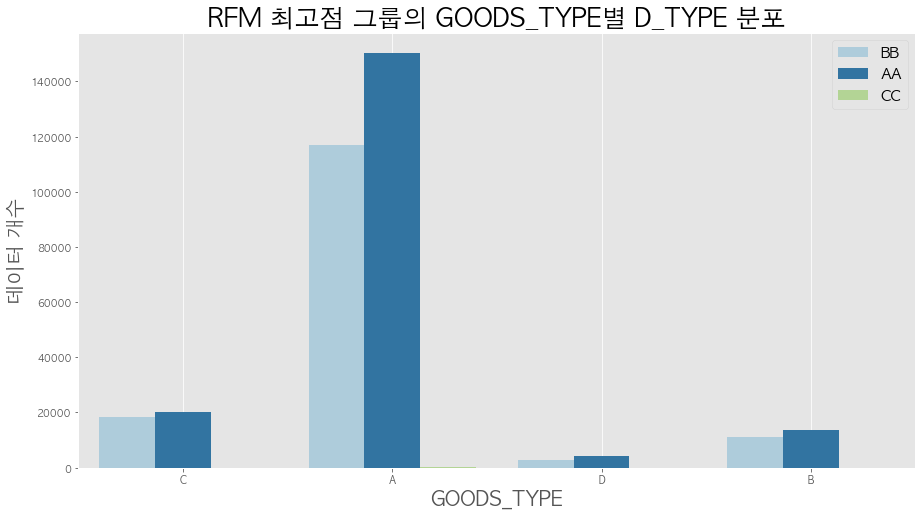

In [49]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)
sns.countplot(x  = 'GOODS_TYPE', hue = 'D_TYPE', data = best_customers_detail)
plt.grid()
plt.title('RFM 최고점 그룹의 GOODS_TYPE별 D_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('GOODS_TYPE', fontsize=20, fontweight = 'bold')

plt.legend(prop={'size': 15})
fig.show()

### 1) RMF 상위 그룹의 GOODS_TYPE 이용

### 2) 요일별 분석

In [50]:
# best_customers_detail['DATE'] = pd.to_datetime(best_customers_detail['DATE'])

# # 요일 컬럼 넣어주기 (월요일:0 ~ 일요일:6)
# # 주말(토,일)은 5,6
# best_customers_detail['dayOFweek'] = best_customers_detail['DATE'].dt.weekday
best_customers_detail

,USER_ID,RFM_total_score,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,dayOFweek
0,5067,15,2014-02-04,BB,203763,C,2020-01-10,1,MP,4
1,5067,15,2014-02-04,BB,220611,A,2020-02-21,1,GSN,4
2,5067,15,2014-02-04,BB,182296,A,2020-05-15,1,SC,4
3,5067,15,2014-02-04,BB,182296,A,2020-05-19,1,SC,1
4,5067,15,2014-02-04,BB,182296,A,2020-05-20,1,SC,2
...,...,...,...,...,...,...,...,...,...,...
337278,1820289,15,2020-12-21,AA,219936,A,2020-12-27,1,YD,6
337279,1820289,15,2020-12-21,AA,219936,A,2020-12-28,1,YD,0
337280,1820289,15,2020-12-21,AA,219936,A,2020-12-29,1,YD,1
337281,1820289,15,2020-12-21,AA,219936,A,2020-12-30,1,YD,2


In [51]:
# 각 요일 기준 count 값 합계 
group_day = best_customers_detail['COUNT'].groupby(best_customers_detail['dayOFweek']).sum()
group_day = group_day.reset_index()
group_day

,dayOFweek,COUNT
0,0,58273
1,1,57730
2,2,56993
3,3,57204
4,4,52022
5,5,33148
6,6,29393


In [52]:
# 전체 데이터에 대한 합계 
day = df['COUNT'].groupby(df['dayOFweek']).sum()
day = day.reset_index()
day

,dayOFweek,COUNT
0,0,129095
1,1,132312
2,2,131984
3,3,134346
4,4,134929
5,5,128136
6,6,112918


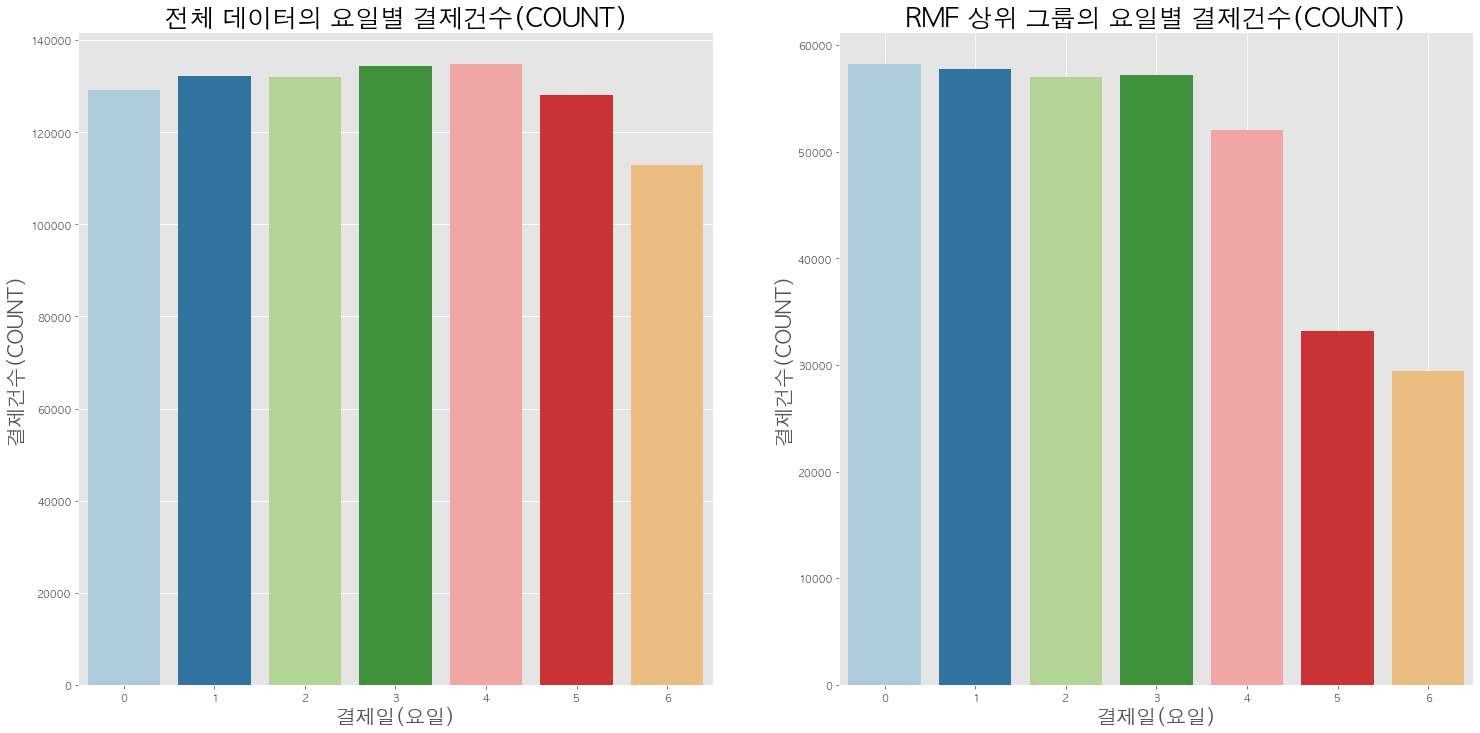

In [53]:
plt.figure(figsize=(25,12))
sns.set_palette("Paired", 9)

plt.subplot(121)
sns.barplot(x=day['dayOFweek'] , y =day['COUNT'])
plt.title('전체 데이터의 요일별 결제건수(COUNT)', fontsize=25)
plt.ylabel('결제건수(COUNT)', fontsize=20)
plt.xlabel('결제일(요일)', fontsize=20)

plt.subplot(122)
sns.barplot(x=group_day['dayOFweek'] , y =group_day['COUNT'])
plt.title('RMF 상위 그룹의 요일별 결제건수(COUNT)', fontsize=25)
plt.ylabel('결제건수(COUNT)', fontsize=20)
plt.xlabel('결제일(요일)', fontsize=20)

plt.grid()
plt.show()

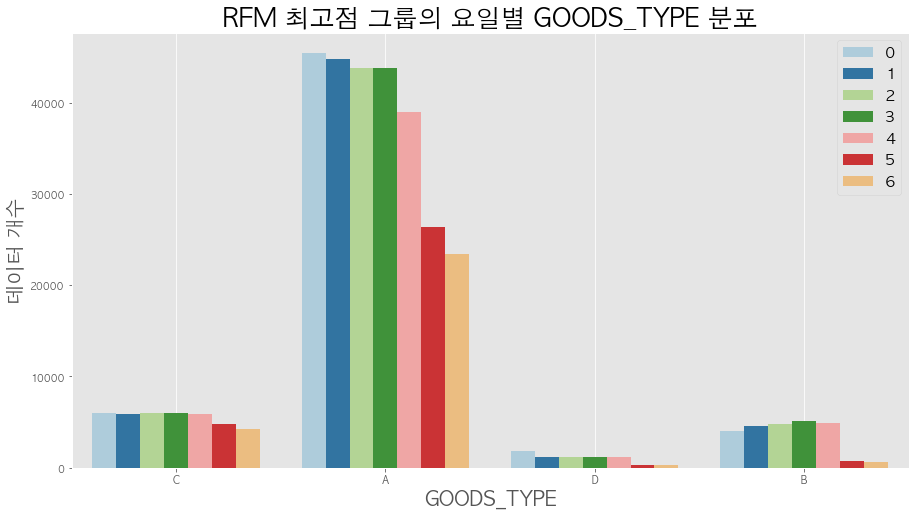

In [54]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)
sns.countplot(x  = 'GOODS_TYPE', hue = 'dayOFweek', data = best_customers_detail)
plt.grid()
plt.title('RFM 최고점 그룹의 요일별 GOODS_TYPE 분포', fontsize=25, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('GOODS_TYPE', fontsize=20, fontweight = 'bold')

plt.legend(prop={'size': 15})
fig.show()

In [55]:
df.groupby(['dayOFweek','D_TYPE']).count().style.background_gradient()

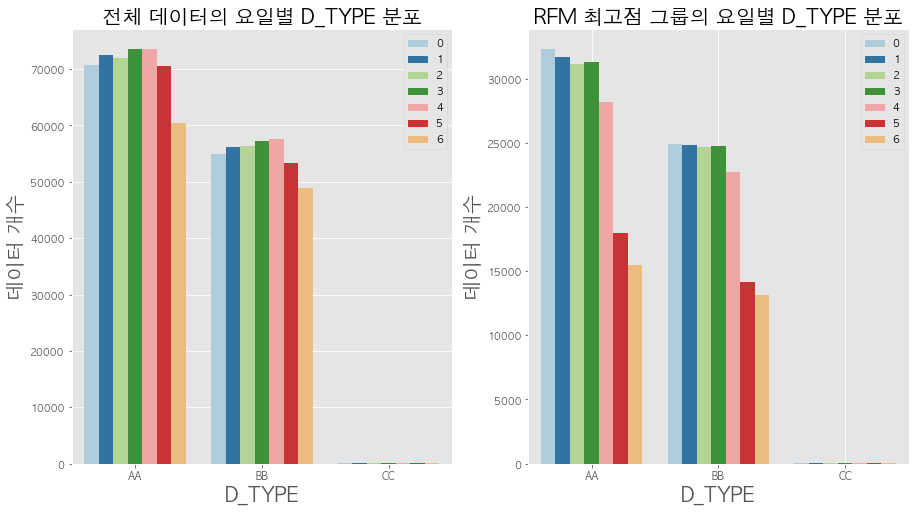

In [56]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
sns.set_palette("Paired", 9)

plt.subplot(121)
sns.countplot(x  = 'D_TYPE', hue = 'dayOFweek', data = df, order=["AA","BB","CC"])
plt.title('전체 데이터의 요일별 D_TYPE 분포', fontsize=20, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')
plt.legend(prop={'size': 10})

plt.subplot(122)
sns.countplot(x  = 'D_TYPE', hue = 'dayOFweek', data = best_customers_detail, order=["AA","BB","CC"])
plt.title('RFM 최고점 그룹의 요일별 D_TYPE 분포', fontsize=20, fontweight = 'bold')
plt.ylabel('데이터 개수', fontsize=20, fontweight = 'bold')
plt.xlabel('D_TYPE', fontsize=20, fontweight = 'bold')
plt.legend(prop={'size': 10})

plt.grid()
fig.show()